<a href="https://colab.research.google.com/github/ab-rohman/Computer_Vision/blob/main/Week10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

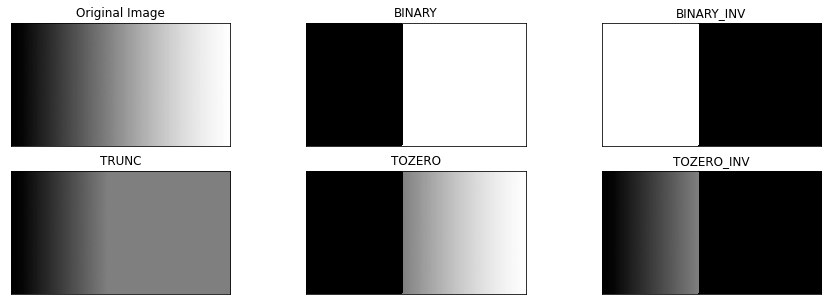

In [3]:
# Step 3 without library
img_src = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Images_PCVK/Images/gradient.jpg', 0)
img_thresh1 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Images_PCVK/Images/gradient.jpg')
img_thresh2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Images_PCVK/Images/gradient.jpg')
img_thresh3 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Images_PCVK/Images/gradient.jpg')
img_thresh4 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Images_PCVK/Images/gradient.jpg')
img_thresh5 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Images_PCVK/Images/gradient.jpg')
thresh_value = 127

#Original Image
img_thresh1[img_src>thresh_value] = 255
img_thresh1[img_src<=thresh_value] = 0

#Binary threshold inverse
img_thresh2 = 255 - img_thresh1           
#Threshold Truncate
img_thresh3[img_src>thresh_value] = thresh_value
#Threshold Tozero
img_thresh4[img_src<=thresh_value] = 0
#Threshold Tozero Inverse
img_thresh5[img_src>thresh_value] = 0

titles = ['Original Image','BINARY','BINARY_INV','TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img_src, img_thresh1, img_thresh2, img_thresh3, img_thresh4, img_thresh5]

plt.figure(figsize = (15,5))
for i in range(len(images)):
  plt.subplot(2,3,i+1),plt.imshow(images[i],'gray', interpolation='nearest')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()


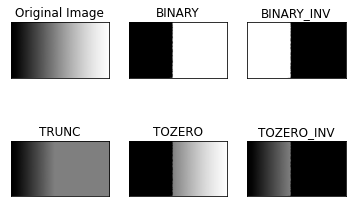

In [4]:
# Step 3 using Library
img_src = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Images_PCVK/Images/gradient.jpg')
ret,thresh1 = cv2.threshold(img_src,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img_src,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img_src,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img_src,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img_src,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img_src, img_thresh1, img_thresh2, img_thresh3, img_thresh4, img_thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

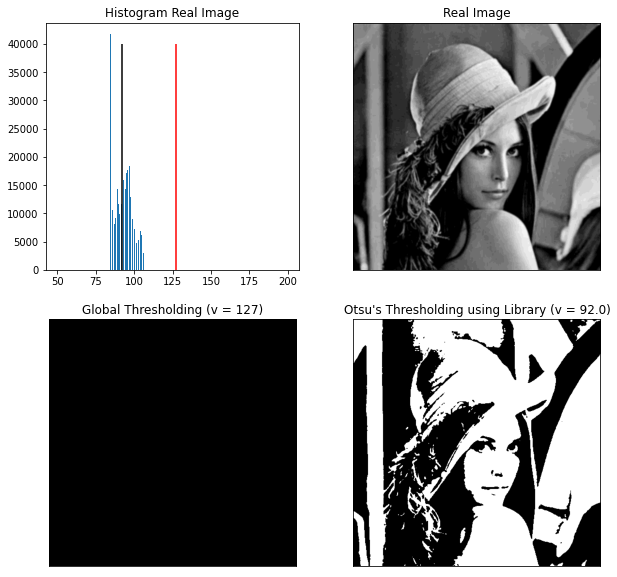

In [7]:
# Step 4 Using Library
img_src2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Images_PCVK/Images/lena_gs_lc2.jpg',0)
img_blur = cv2.GaussianBlur(img_src2,(5,5),0)
thresh_value = 127

ret,th1 = cv2.threshold(img_blur,thresh_value,255,cv2.THRESH_BINARY)
ret2,th2 = cv2.threshold(img_blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

x = ("Otsu's Thresholding using Library (v = ")+str(ret2)+")"
titles = ['Real Image', 'Global Thresholding (v = 127)', x]
citra3 = [img_blur, th1, th2]
plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.hist(img_blur.ravel(),256,[50,200])

plt.vlines(ret,0,40000,colors='red')
plt.vlines(ret2,0,40000,colors='black')
plt.title('Histogram Real Image')

for i in range(len(citra3)):
  plt.subplot(2,2,i+2),plt.imshow(citra3[i],'gray')
  plt.title(titles[i])
  plt.xticks([]),plt.yticks([])

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide


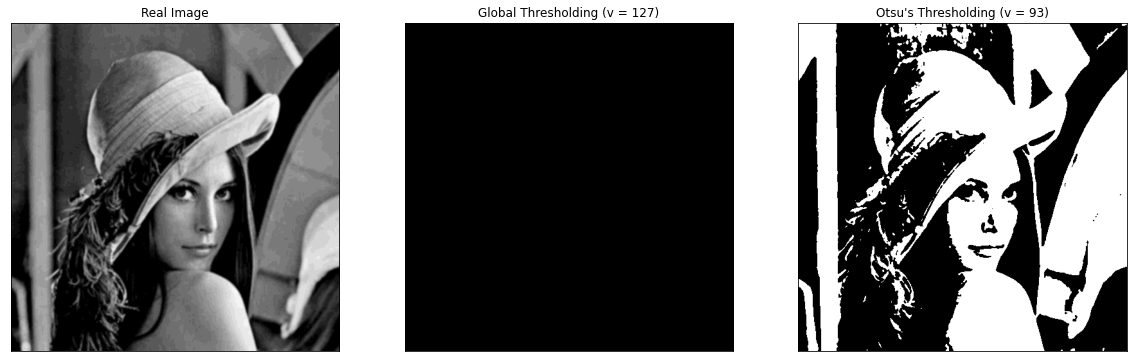

In [8]:
# Step 4 Without Library
img_src2 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Images_PCVK/Images/lena_gs_lc2.jpg',0)
img_blur = cv2.GaussianBlur(img_src2, (5,5),0)
img_hist = cv2.calcHist([img_blur],[0],None,[256], [0,256])

hist_norm = img_hist.ravel()/img_hist.max() 
Q = hist_norm.cumsum() 
bins = np.arange (256) 
wb = 0 
sumb = 0 
varmax = 0 
fn_min = np.inf 
thresh = -1

for i in range(0,255):
  wb += img_hist[i]
  wf = (img_src2.shape[0]*img_src2.shape[1]) - wb
  sumb += (i*img_hist[i])
  mb = sumb / wb
  mf = (sumb - sumb)/wf
  betweenvar = wb * wf * (mb - mf) * (mb - mf)

  if (betweenvar>varmax):
    varmax = betweenvar
    thresh = i

x = ("Otsu's Thresholding (v = ")+str(thresh)+")"
ret, th1 = cv2.threshold(img_blur, 127, 255, cv2.THRESH_BINARY)
ret, th2 = cv2.threshold (img_blur, thresh, 255, cv2. THRESH_BINARY)

titles = ['Real Image', 'Global Thresholding (v = 127)', x]
citra3 = [img_blur, th1, th2]
plt.figure(figsize = (20,15))

for i in range(len(citra3)):
    plt. subplot(1,3,i+1),plt.imshow(citra3[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version,

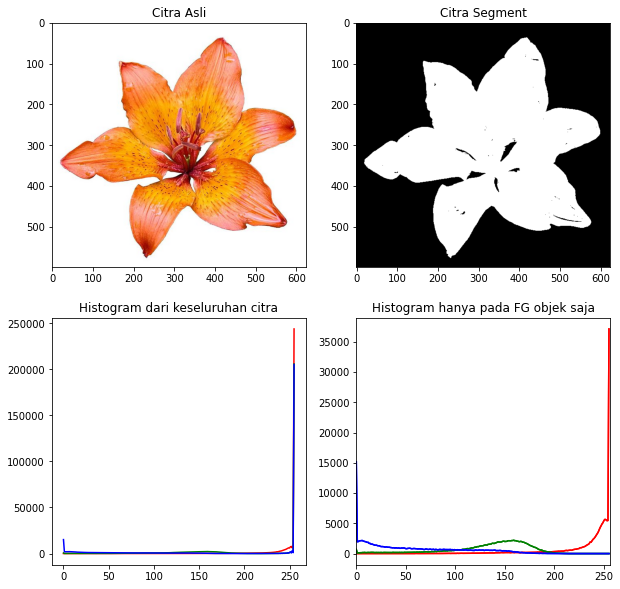

In [10]:
# Step 5 Create Histogram Segmented Image
img_src3 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Images_PCVK/Images/lily.jpg')
img_cvt = cv2.cvtColor(img_src3,cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_cvt,cv2.COLOR_BGR2GRAY)

ret3,mask = cv2.threshold(img_gray,200,255,cv2.THRESH_BINARY_INV)

plt.figure(figsize = (10,10))
plt.subplot(2,2,1),plt.imshow(img_cvt)
plt.title('Citra Asli')
plt.subplot(2,2,2),plt.imshow(mask, 'gray')
plt.title('Citra Segment')
color = ('r','g','b')

for i,col in enumerate(color):
    hist0 = cv2.calcHist([img_cvt],[i],None,[256],[0,256])
    plt.subplot(2,2,3),plt.plot(hist0,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_cvt],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram dari keseluruhan citra')
    hist1 = cv2.calcHist([img_cvt],[i],mask,[256],[0,256])
    plt.subplot(2,2,4),plt.plot(hist1,color = col)
    plt.title('Histogram hanya pada FG objek saja')
    plt.xlim([0,256])

plt.show()

(<matplotlib.axes._subplots.AxesSubplot at 0x7fcf98ba8c90>,
 <matplotlib.image.AxesImage at 0x7fcf97d33d90>)

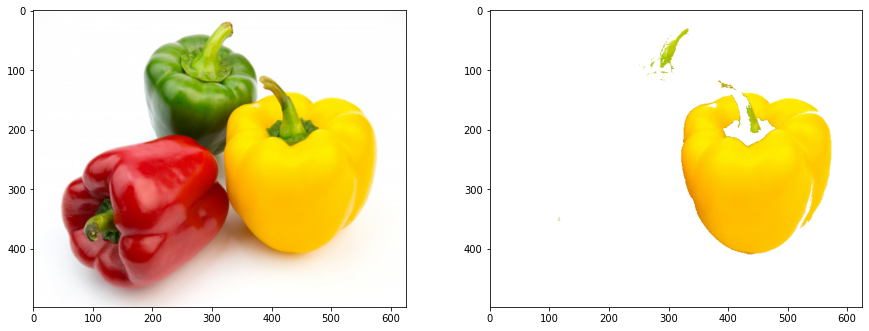

In [15]:
# Step 6 Perform color segmentation on the image "peppers.jpg"
img_src4 = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Images_PCVK/Images/peppers.jpg')
img_cvt2 = cv2.cvtColor(img_src4,cv2.COLOR_BGR2RGB)

pixel_values = img_cvt2.reshape((-1, 3)) 
pixel_values = np.float32(pixel_values)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
k = 6
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
centers = np.uint8(centers)
labels = labels.flatten()

img_masked = np.copy(img_cvt2)
img_masked2 = img_masked.reshape((-1, 3))
img_masked2[labels != 1] = [255, 255, 255]
img_masked2 = img_masked2.reshape(img_cvt2.shape)

plt.figure(figsize = (15,12))
plt.subplot(2,2,1),plt.imshow(img_cvt2)
plt.subplot(2,2,2),plt.imshow(img_masked2)